In [1]:
import numpy as np
import array
import sys
import matplotlib.pyplot as plt
from math import sin

import pylab as pl

In [2]:
project='Spall'

In [3]:
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32

Ho=600  # ocean depth in meters
nx=20    # number of gridpoints in x-direction
ny=120    # number of gridpoints in y-direction
nz=10     # number of gridpoints in z-direction
nt=12 #nt=10  #for 3 years with timestep 60 s

dx=5
dy=5
dz=60

x=np.arange(0,nx*dx,dx)
y=np.arange(0,ny*dy,dy)
z=np.arange(0,nz*dz,dz)

lat=(22.92+31.70)/2

omega=7.2921*(10**(-5)) 

f=2*omega*sin(np.deg2rad(lat))

In [4]:
params = {'font.size': 8,
          'figure.figsize': (5, 3),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [5]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

#### Heatflux Gaussian

In [ ]:
#Heatflux Gaussian
mu=200
sig=60

Q=np.zeros((nx,ny,nt), dtype=dtype)
Q[:,:,0]=np.flip(-14000*gaussian(y, mu, sig))
Q[:,:,1]=np.flip(-14000*gaussian(y, mu, sig))

#### Spall

In [45]:
def gauss2d(mat, sigma, center):
    gsize = np.shape(mat)
    [R,C] = np.meshgrid(np.arange(0,gsize[0],1),np.arange(0,gsize[1],1))
    mat = gaussC(R,C, sigma, center)
    return mat

def gaussC(x, y, sigma, center):
    xc = center[0]
    yc = center[1]
    exponent = (np.power((x-xc),2) + np.power((y-yc),2))/(2*sigma)
    val= np.exp(-exponent)
    return val

In [50]:
X,Xno=np.meshgrid(x,x)

In [51]:
np.shape(X)

(20, 20)

In [56]:
out=gauss2d(X,12,[10,10])*-360000

In [57]:
Q=np.zeros((nx,ny,nt), dtype=dtype)
Q[:,70:90,0]=out
Q[:,70:90,1]=out


In [58]:
np.mean(Q[:,20:,:])

-2243.2632

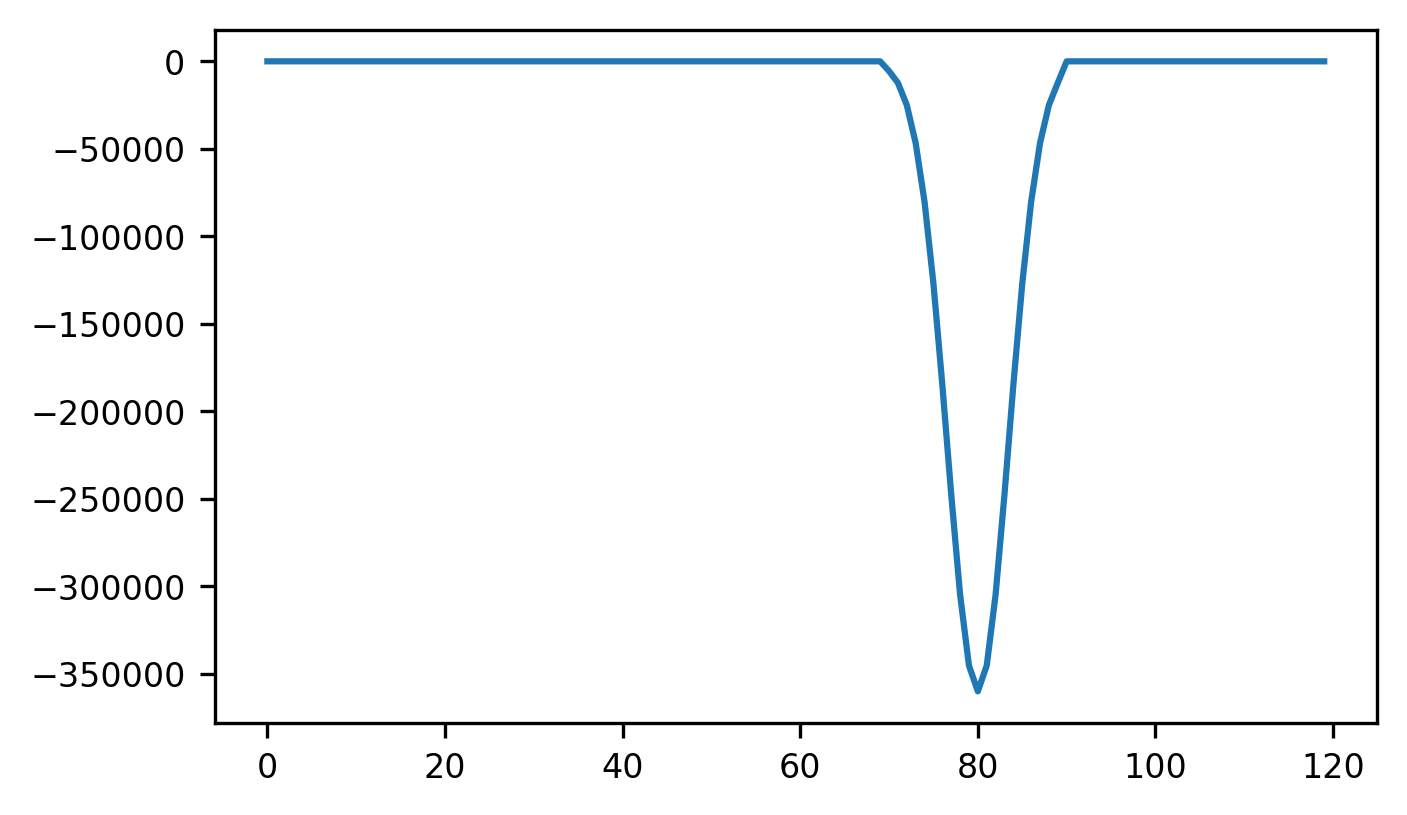

In [59]:
plt.plot(Q[10,:,0])

In [105]:

mu=0
sig=30


T_mask=np.zeros((nz,nx,ny), dtype=dtype)
maskin=gaussian(y, mu, sig)*100
T_mask[:,:,0:20]=maskin[0:20]/np.max(maskin)

In [107]:
np.max(T_mask)

1.0

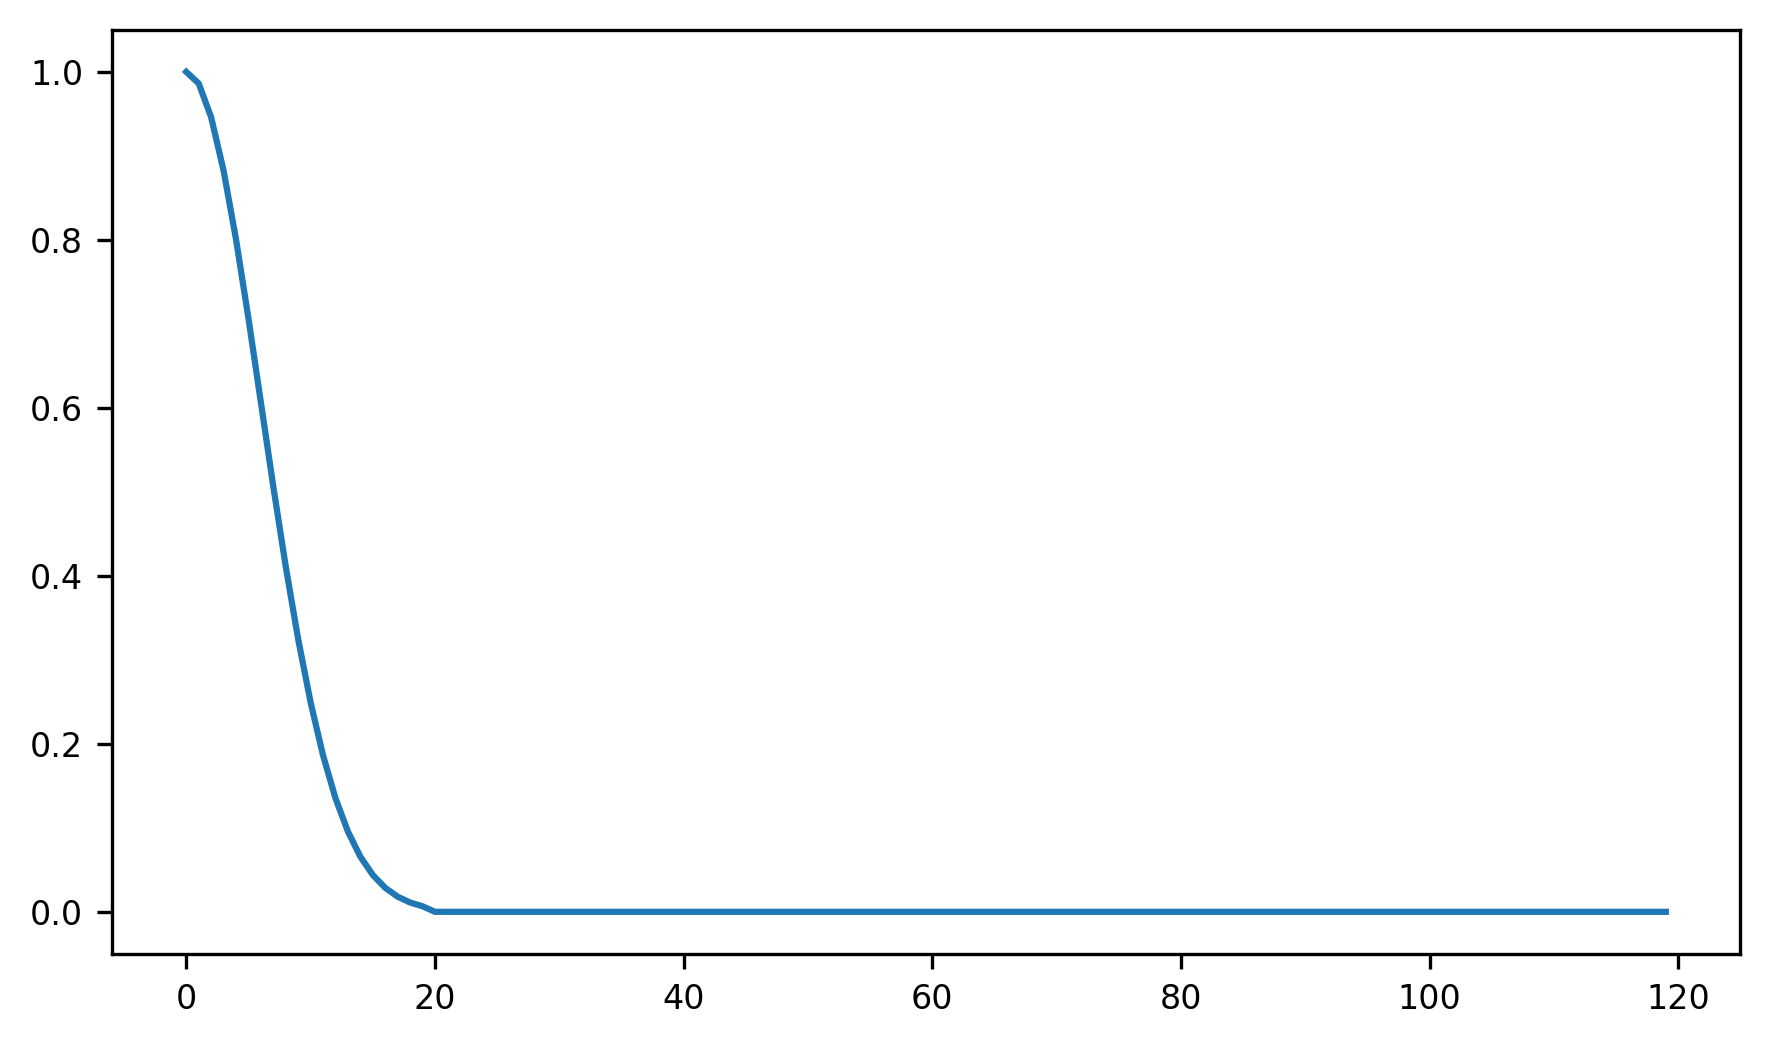

In [106]:
plt.plot(T_mask[0,10,:])

In [49]:
tempRelax=15*np.ones((nz,ny,nx),dtype=dtype)

tempBo=15*np.ones((nx,nz,nt),dtype=dtype)

In [203]:
params = {'font.size': 8,
          'figure.figsize': (1, 4),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

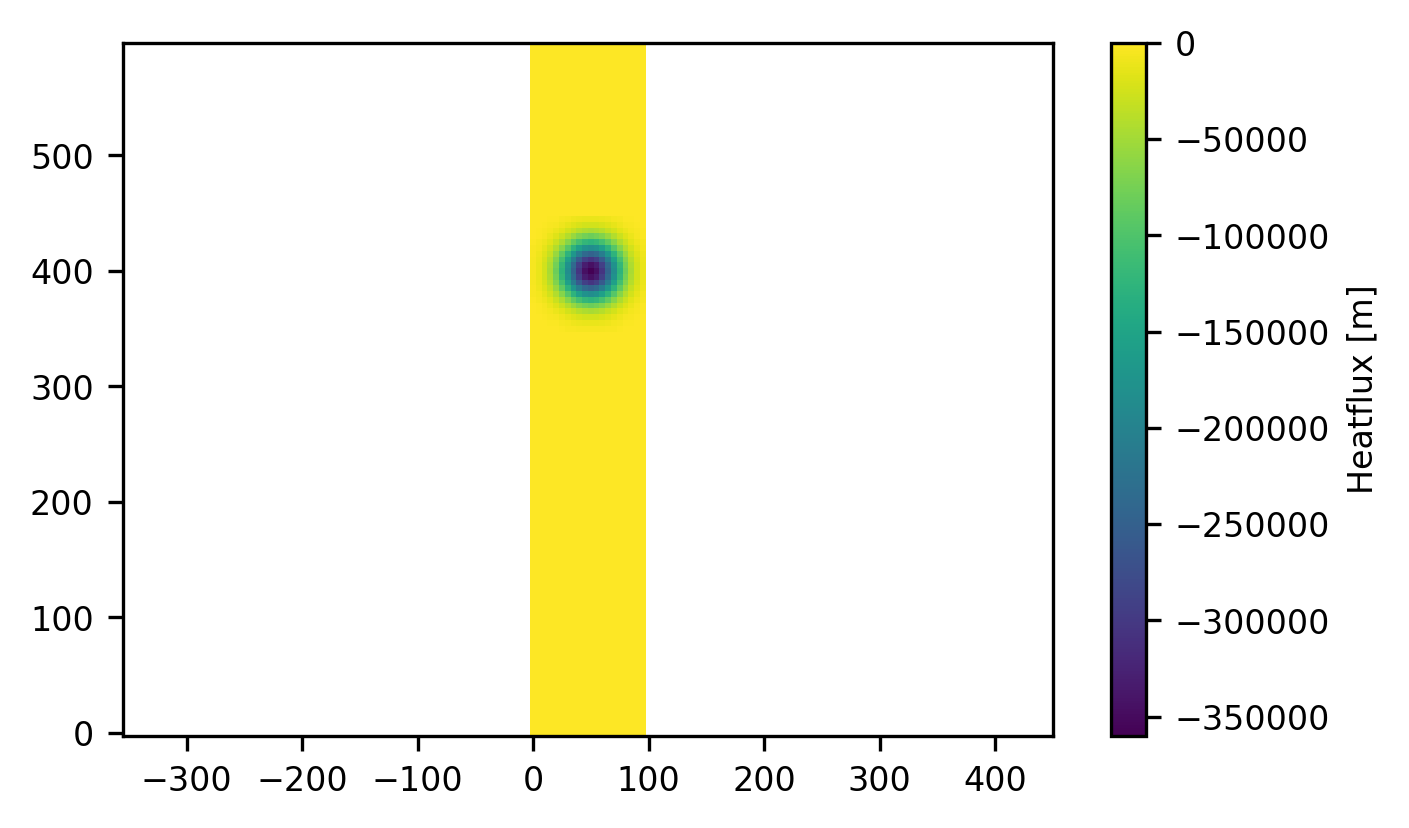

In [60]:
fig,ax=plt.subplots()
cax=ax.pcolormesh(x,y,Q[:,:,0].T)
ax.axis('equal')
cbar=plt.colorbar(cax)
cbar.set_label('Heatflux [m]')

In [75]:
ho=-Ho*np.ones((nx,ny),dtype=dtype)
ho[0,:]=0
ho[-1,:]=0
ho[:,-1]=0

In [209]:
#OBCS

tempBo=15*np.ones((nx,nz,nt),dtype=dtype)

### Attempt at linear startification 

In [187]:
arrZ=np.array((5,5,5,8,8,10,10,10,12,12,15,15,15,20,40,50,60,100,100,100))
print(sum(arrZ))
print(len(arrZ))
z=np.cumsum(arrZ)

600
20


In [201]:
Temp=np.zeros((nx,ny,nz), dtype=dtype)
m=0.02
T=15 - m*z
Temp[:,:]=T

In [215]:
T


array([14.9 , 14.8 , 14.7 , 14.54, 14.38, 14.18, 13.98, 13.78, 13.54,
       13.3 , 13.  , 12.7 , 12.4 , 12.  , 11.2 , 10.2 ,  9.  ,  7.  ,
        5.  ,  3.  ])

### Intent with Z being equally spaced, Heatflux just a block

In [40]:
ho=-Ho*np.ones((nx,ny),dtype=dtype)
ho[0,:]=0
ho[-1,:]=0
ho[:,-1]=0

In [ ]:
Q=np.zeros((nx,ny,nt), dtype=dtype)
Q[:,70:90,1]=-80

In [44]:
strat=np.ones(ny)*15

# Plotting

In [85]:
params = {'font.size': 8,
          'figure.figsize': (7, 4),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [86]:
np.shape(tempBo)

(20, 10, 12)

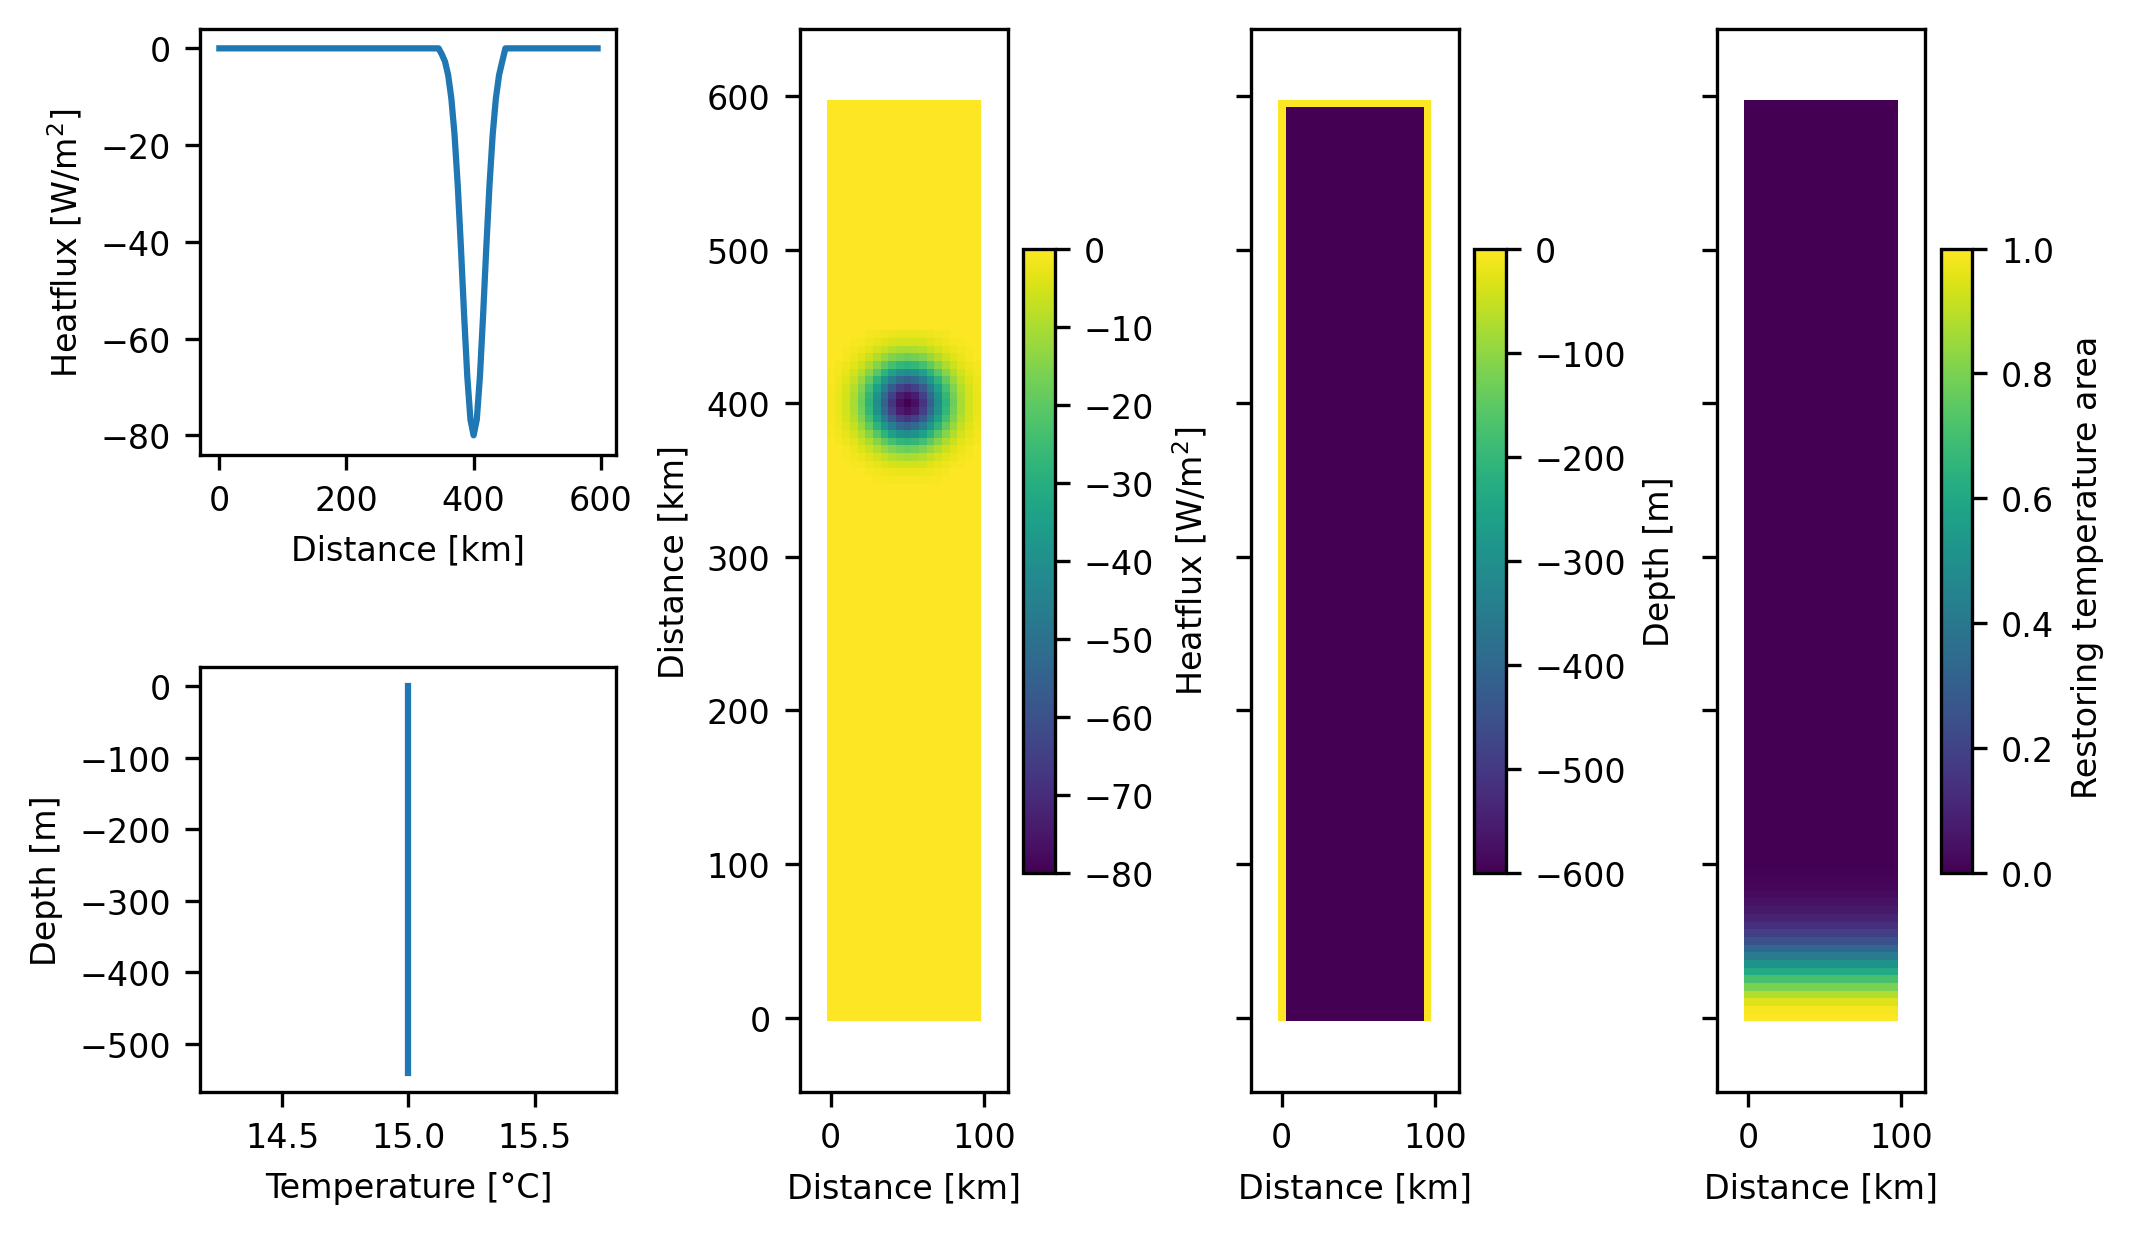

In [110]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2, 5)
ax = fig3.add_subplot(gs[0, 0:2])

ax.plot(y,Q[10,:,0] )
ax.set(xlabel='Distance [km]',ylabel='Heatflux [W/m$^2$]')

ax = fig3.add_subplot(gs[1, 0:2])

ax.plot(tempBo[10,:,0],-z )
ax.set(xlabel='Temperature [°C]',ylabel='Depth [m]')


ax = fig3.add_subplot(gs[:, 2])
cax=ax.pcolormesh(x,y,Q[:,:,1].T)
ax.axis('equal')
cbar= plt.colorbar(cax)
cbar.set_label('Heatflux [W/m$^2$]')
ax.set(xlabel='Distance [km]',ylabel='Distance [km]')


ax = fig3.add_subplot(gs[:, 3])

cax=ax.pcolormesh(x,y,ho.T)
ax.axis('equal')
cbar= plt.colorbar(cax)
cbar.set_label('Depth [m]')
ax.set(xlabel='Distance [km]')
ax.yaxis.set_tick_params(labelleft=False)

ax = fig3.add_subplot(gs[:, 4])

cax=ax.pcolormesh(x,y,T_mask[0,:,:].T)
ax.axis('equal')
cbar= plt.colorbar(cax)
cbar.set_label('Restoring temperature area ')
ax.set(xlabel='Distance [km]')
ax.yaxis.set_tick_params(labelleft=False)



fig.tight_layout()
fig.patch.set_alpha(0.0)
plt.savefig('../Figures/' + str(project) + '/InputVars.png', bbox_inches='tight')


# Save the file

In [116]:
f = open('../' + str(project) + '/input/Qnet.bin','wb')
write_with_byte_inversion(f, Q)
f.close()

In [114]:
f = open('../' + str(project) + '/input/bathy.bin','wb')
write_with_byte_inversion(f, ho)
f.close()

In [115]:
f = open('../' + str(project) + '/input/tempOBCS.bin','wb')
write_with_byte_inversion(f, tempBo)
f.close()

In [117]:
f = open('../' + str(project) + '/input/T_relax_mask.bin','wb')
write_with_byte_inversion(f, T_mask)
f.close()

In [118]:
f = open('../' + str(project) + '/input/temperature.bin','wb')
write_with_byte_inversion(f, tempRelax)
f.close()